## **Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pickle
from flask import Flask, request, jsonify

## **Load Dataset**

In [4]:
# Load the dataset
file_path = '/Users/nags26/Downloads/default of credit card clients.xls'
df = pd.read_excel(file_path, skiprows=1)  # skipping the first row (column names are on the second row)
df.columns = ['ID'] + list(df.columns[1:])  # Rename ID column for clarity
df.drop('ID', axis=1, inplace=True)  # Dropping the ID column

## **EDA**

In [5]:
#Checking Dataset Structure and Overview
print("Dataset shape:", df.shape)
print("\nColumns and Data Types:")
print(df.info())

Dataset shape: (30000, 24)

Columns and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3

In [6]:
# Checking for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


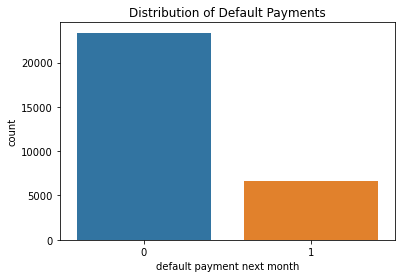

In [7]:
# Checking for class imbalance in the target variable
sns.countplot(x='default payment next month', data=df)
plt.title('Distribution of Default Payments')
plt.show()

In [8]:
# Numerical Features
print("\nSummary Statistics for Numerical Features:")
print(df.describe())


Summary Statistics for Numerical Features:
            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0

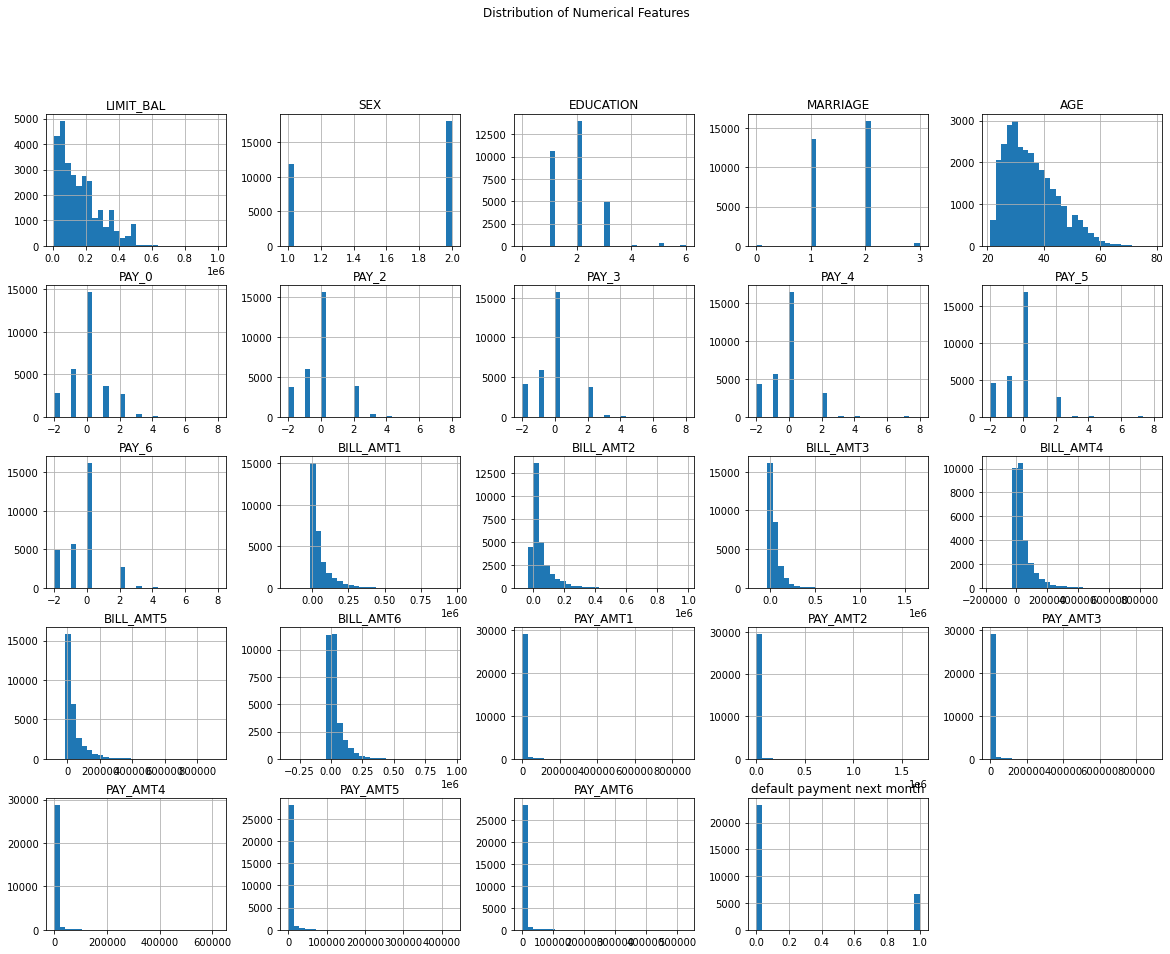

In [9]:
# Visualizing Distributions
# Histograms for numerical features
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribution of Numerical Features')
plt.show()

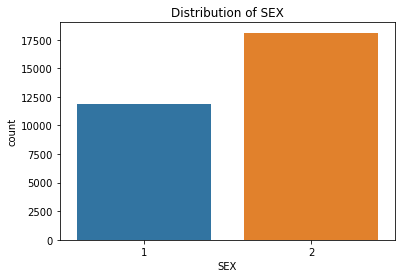

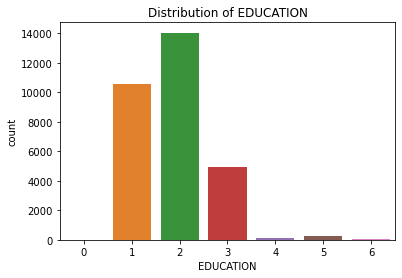

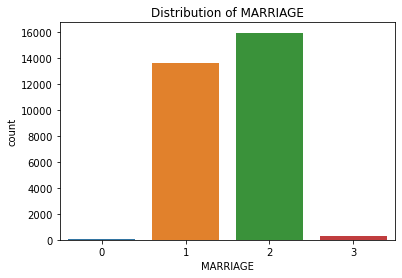

In [10]:
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

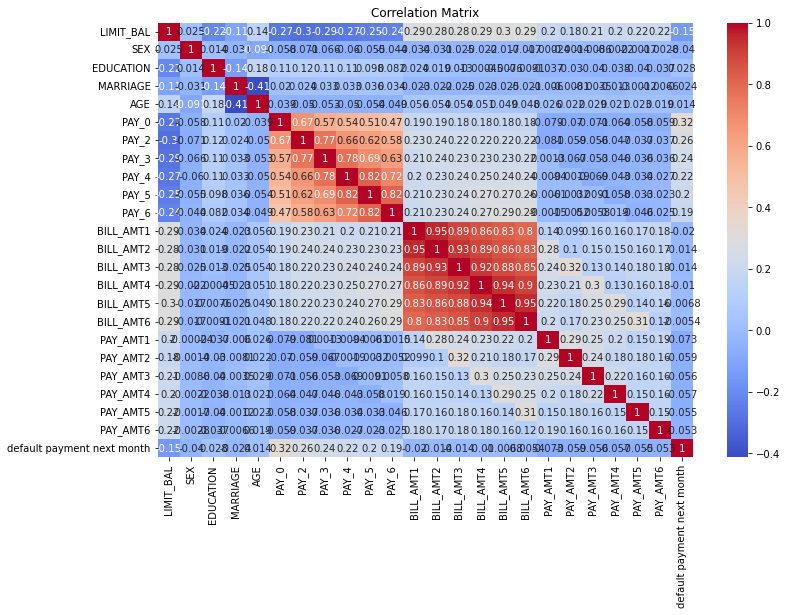

In [11]:
# Correlation Matrix for Numerical Features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

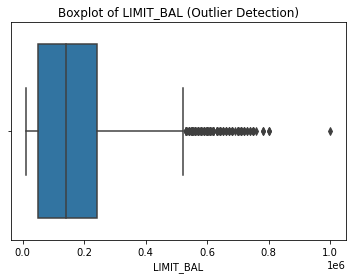

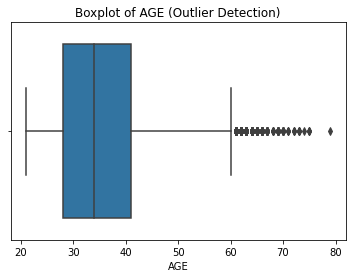

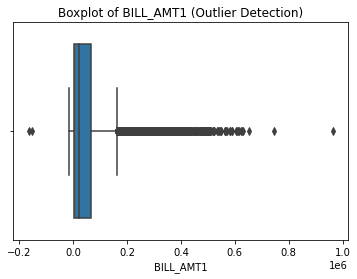

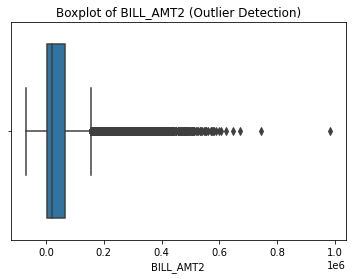

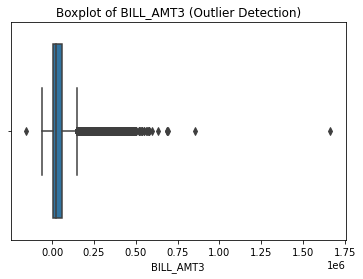

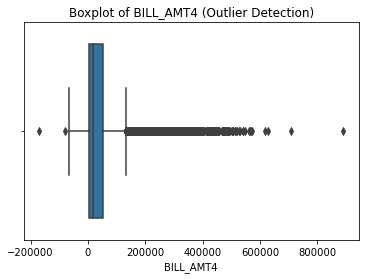

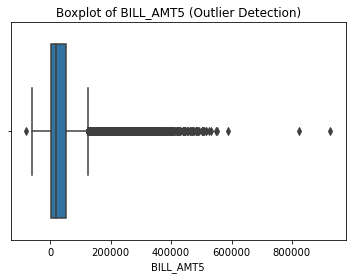

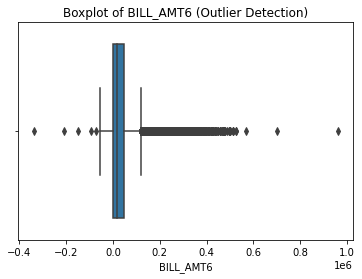

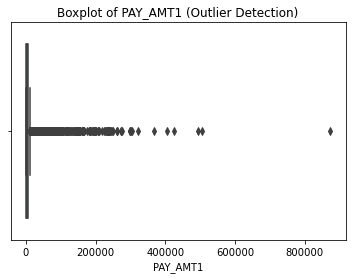

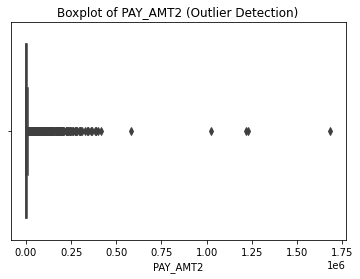

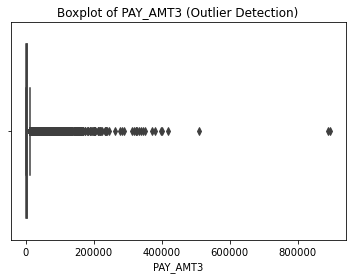

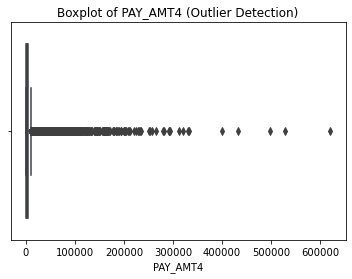

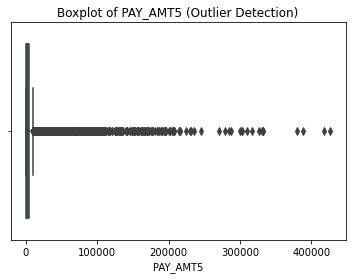

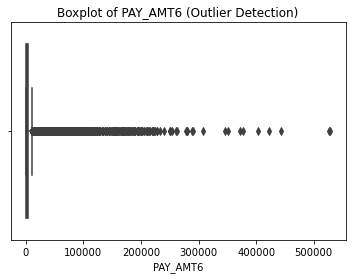

In [12]:
# Box plots to identify outliers for numerical columns
numerical_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                  'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (Outlier Detection)')
    plt.show()

In [13]:
# Handling Outliers - Remove outliers using IQR method
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"\nShape of dataset after outlier removal: {df_clean.shape}")


Shape of dataset after outlier removal: (19548, 24)


In [14]:
# Simple Imputation: fill missing values with mean/median (if necessary)
df.fillna(df.median(), inplace=True)

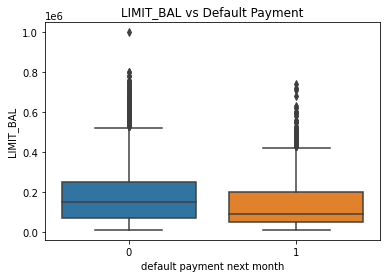

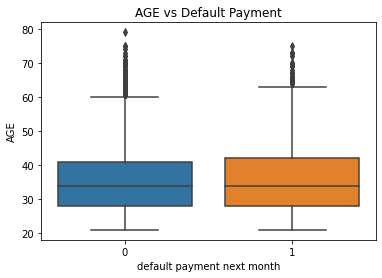

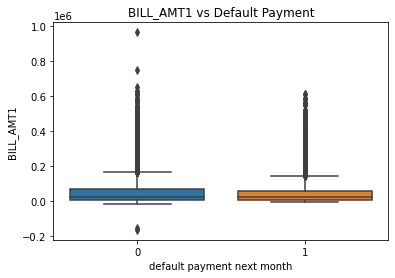

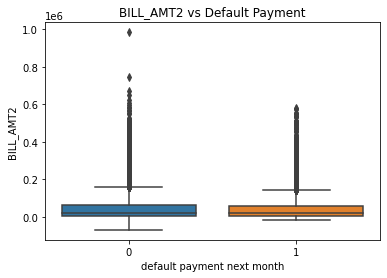

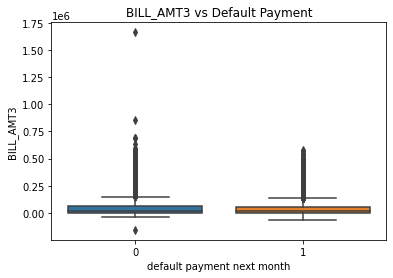

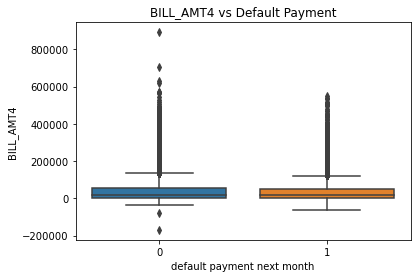

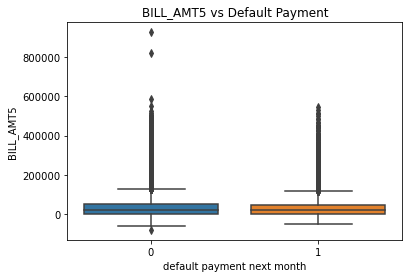

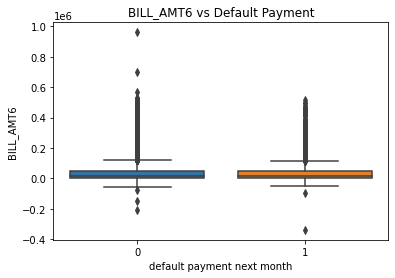

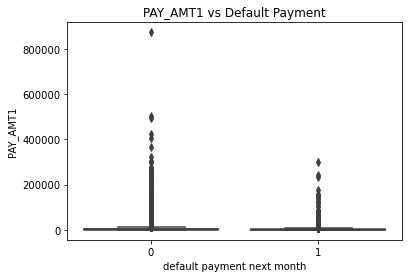

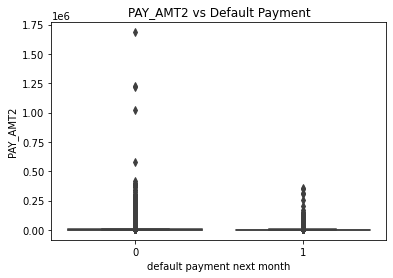

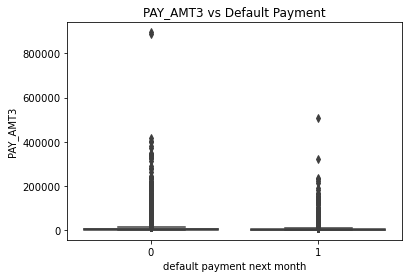

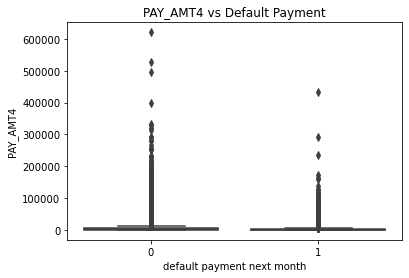

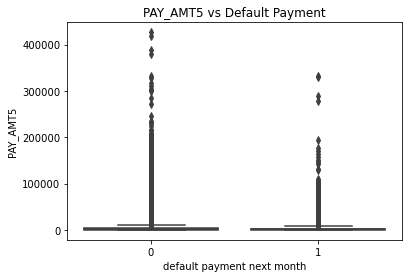

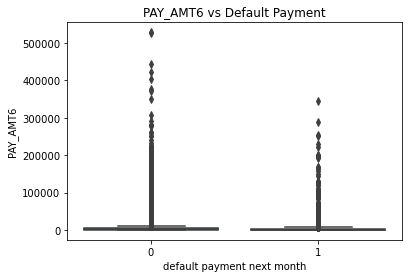

In [15]:
# Boxplot to show distribution of numerical variables across the target variable
for col in numerical_cols:
    sns.boxplot(x='default payment next month', y=col, data=df)
    plt.title(f'{col} vs Default Payment')
    plt.show()

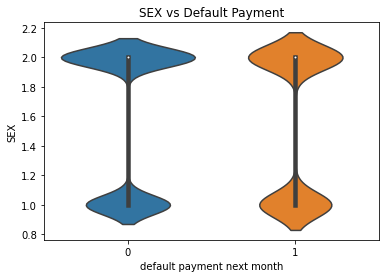

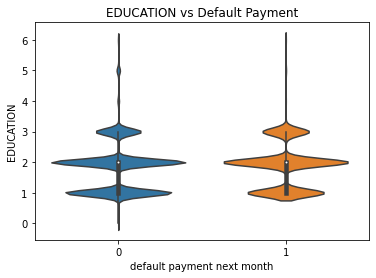

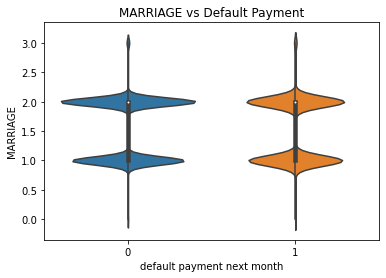

In [16]:
# Violin plot for categorical variables against the target
for col in categorical_cols:
    sns.violinplot(x='default payment next month', y=col, data=df)
    plt.title(f'{col} vs Default Payment')
    plt.show()

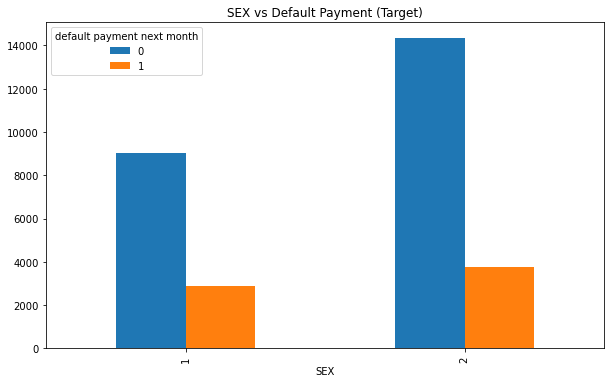

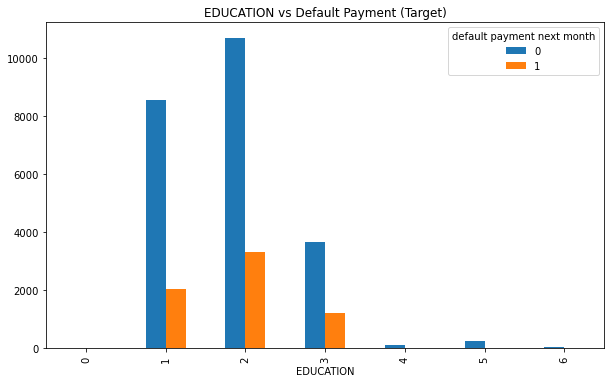

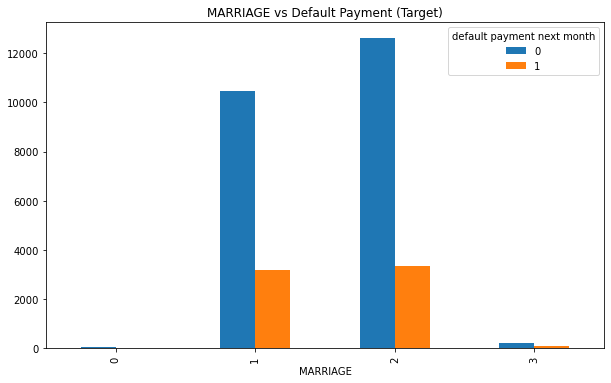

In [17]:
# Correlation between categorical variables and target
for col in categorical_cols:
    pd.crosstab(df[col], df['default payment next month']).plot(kind='bar', figsize=(10,6))
    plt.title(f'{col} vs Default Payment (Target)')
    plt.show()

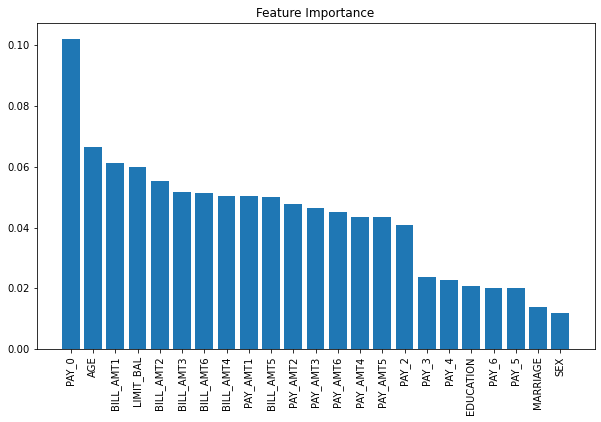

In [18]:
# Feature Importance (for Random Forest, for example)
from sklearn.ensemble import RandomForestClassifier

# Sample feature importance calculation
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualize Feature Importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

## **Data Pre-processing**

In [19]:
# Define X (features) and y (target)
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Model Building And Evaluation**

In [20]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy:  0.81
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [21]:
# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predictions
y_pred_dtree = dtree.predict(X_test)

# Evaluation
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))

Decision Tree Accuracy:  0.725
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.41      0.39      1313

    accuracy                           0.72      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000



In [22]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy:  0.816
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



## **Model Selection**

In [23]:
# Compare models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_dtree), accuracy_score(y_test, y_pred_rf)]
for i in range(len(models)):
    print(f"{models[i]}: {accuracies[i]:.4f}")

Logistic Regression: 0.8100
Decision Tree: 0.7250
Random Forest: 0.8160


## **Choosing the best model**

In [24]:
# Assuming Random Forest performed the best
best_model = rf

# Save the model using pickle
model_filename = 'credit_default_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

# Save the scaler as well
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

## **Create a flask API**

In [31]:
from flask import Flask, request, jsonify
import pickle
import numpy as np

# Initialize Flask app
app = Flask(__name__)

# Load the model and scaler
with open('credit_default_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON data from the POST request
        data = request.get_json()

        # Ensure the data is provided
        if not data:
            return jsonify({'error': 'No input data provided'}), 400

        # Convert data into numpy array
        input_data = np.array([list(data.values())])

        # Scale the input data
        input_data_scaled = scaler.transform(input_data)

        # Make prediction
        prediction = model.predict(input_data_scaled)

        # Return the prediction result
        return jsonify({'prediction': int(prediction[0])})

    except Exception as e:
        # Handle exceptions and return an error message
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    # Run the app, set host and port
    app.run(debug=True, host='127.0.0.1', port=8000)  # Updated to run on port 8000

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8000/ (Press CTRL+C to quit)
 * Restarting with watchdog (fsevents)
Traceback (most recent call last):
  File "/Users/nags26/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/nags26/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.initialize(argv)
  File "/Users/nags26/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 88, in inner
    return method(app, *args, **kwargs)
  File "/Users/nags26/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 632, in initialize
    self.init_sockets()
  File "/Users/nags26/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 282, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket, self.shell_port)
  File "/Users/nags26/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", li

SystemExit: 1